In [11]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [12]:
#model_result_dir = '/data/exjobb/sarssw/result_predictions/best_val_loss-epoch=15-val_loss=0.28.ckpt'
#model_result_dir = '/data/exjobb/sarssw/result_predictions/best_val_loss-epoch=41-val_loss=0.28.ckpt'
#model_result_dir = '/data/exjobb/sarssw/result_predictions/latest-epoch-epoch=56.ckpt'

model_result_dir = '/data/exjobb/sarssw/result_predictions_only_features/best_val_loss-epoch=41-val_loss=0.31.ckpt'
#model_result_dir = '/data/exjobb/sarssw/result_predictions_only_features/best_val_loss-epoch=55-val_loss=0.31.ckpt'
#model_result_dir = '/data/exjobb/sarssw/result_predictions_only_features/latest-epoch-epoch=99.ckpt'

In [13]:
# Read results
with open(os.path.join(model_result_dir, 'results.txt'), 'r') as f:
    print(f.read())

Validation on the train data:
[{'val_loss': 0.2668028771877289, 'val_wave_rmse': 0.4351373016834259, 'val_wind_rmse': 1.530232310295105, 'val_wave_mae': 0.34344375133514404, 'val_wind_mae': 1.233670949935913}]
Validation on the validation data:
[{'val_loss': 0.3121592402458191, 'val_wave_rmse': 0.5390944480895996, 'val_wind_rmse': 1.5561339855194092, 'val_wave_mae': 0.40766641497612, 'val_wind_mae': 1.2702010869979858}]
Test result on the test data:
[{'test_loss': 0.30441197752952576, 'test_wave_rmse': 0.5255304574966431, 'test_wind_rmse': 1.5333318710327148, 'test_wave_mae': 0.3974621891975403, 'test_wind_mae': 1.266974687576294}]


In [14]:
result_df_final = pd.read_csv(os.path.join(model_result_dir, 'test_predictions.csv')) #train_predictions.csv test_predictions.csv val_predictions.csv

In [15]:
result_df_final

,Unnamed: 0,file_name,target_wave,target_wind,prediction_wave,prediction_wind
0,0,S1A_IW_GRDH_1SDV_20210101T194927_20210101T1949...,1.539,-1.000000,0.961581,6.615928
1,1,S1A_IW_GRDH_1SDV_20210101T194927_20210101T1949...,1.539,-1.000000,1.392964,5.015776
2,2,S1A_IW_GRDH_1SDV_20210101T213040_20210101T2131...,3.199,-1.000000,3.706038,13.250216
3,3,S1A_IW_GRDH_1SDV_20210101T213040_20210101T2131...,3.199,-1.000000,3.493739,13.495232
4,4,S1A_IW_GRDH_1SDV_20210101T213040_20210101T2131...,3.199,-1.000000,3.302687,13.798271
...,...,...,...,...,...,...
52364,52364,S1B_IW_GRDH_1SDV_20211223T064927_20211223T0649...,2.190,5.879277,1.964695,4.875398
52365,52365,S1B_IW_GRDH_1SDV_20211223T064927_20211223T0649...,2.190,5.879277,2.071046,5.895127
52366,52366,S1B_IW_GRDH_1SDV_20211223T064927_20211223T0649...,2.190,5.879277,2.102718,4.215641
52367,52367,S1B_IW_GRDH_1SDV_20211223T064927_20211223T0649...,2.190,5.879277,2.100601,3.907291


In [16]:
print((result_df_final['target_wave'] == -1).sum())
print((result_df_final['target_wind'] == -1).sum())

4573
29692


In [17]:
wave_mask = result_df_final['target_wave'] != -1
wave_result_df = result_df_final[wave_mask][['target_wave', 'prediction_wave']]
display(wave_result_df)

wind_mask = result_df_final['target_wind'] != -1
wind_result_df = result_df_final[wind_mask][['target_wind', 'prediction_wind']]
display(wind_result_df)

,target_wave,prediction_wave
0,1.539,0.961581
1,1.539,1.392964
2,3.199,3.706038
3,3.199,3.493739
4,3.199,3.302687
...,...,...
52364,2.190,1.964695
52365,2.190,2.071046
52366,2.190,2.102718
52367,2.190,2.100601


,target_wind,prediction_wind
11,7.200000,6.857239
12,7.200000,6.818854
13,7.200000,7.003620
14,7.200000,6.987371
15,7.200000,6.095777
...,...,...
52364,5.879277,4.875398
52365,5.879277,5.895127
52366,5.879277,4.215641
52367,5.879277,3.907291


In [18]:
def scatterplot_and_heatmaps(df, name_text, unit, target_column, prediction_column, alpha=0.01):
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    axs[0].scatter(df[target_column], df[prediction_column], alpha=alpha)
    axs[0].plot([0, 1], [0, 1], color='black', transform=axs[0].transAxes, label='Identity line x=y') #Plot identity line
    axs[0].set_title('Scatterplot for ' + name_text)
    axs[0].set_xlabel(f"Target {name_text} [{unit}]")
    axs[0].set_ylabel(f"Predicted {name_text} [{unit}]")
    axs[0].legend()

    (h2d_h, h2d_xedg, h2d_yedg, h2d_img) = axs[1].hist2d(df[target_column], df[prediction_column], bins=100, norm=mpl.colors.LogNorm(clip=True))
    axs[1].plot([0, 1], [0, 1], color='black', transform=axs[1].transAxes, label='Identity line x=y') #Plot identity line
    axs[1].set_title('Heatmap for ' + name_text + ', log scaled colormap')
    axs[1].set_xlabel(f"Target {name_text} [{unit}]")
    axs[1].set_ylabel(f"Predicted {name_text} [{unit}]")
    fig.colorbar(h2d_img, ax=axs[1], label='Count colormap')
    axs[1].legend()

    hist = h2d_h.copy().T
    with np.errstate(divide='ignore', invalid='ignore'):  # suppress division by zero warnings
        hist *= 1 / hist.sum(axis=0, keepdims=True)
        
    #Remove nans, to remove white columns
    hist[np.isnan(hist)] = 0

    pcm = axs[2].pcolormesh(h2d_xedg, h2d_yedg, hist, norm=mpl.colors.LogNorm(clip=True))
    axs[2].plot([0, 1], [0, 1], color='black', transform=axs[2].transAxes, label='Identity line x=y') #Plot identity line
    axs[2].set_title('Heatmap for ' + name_text + ', normalized columns, log scaled colormap')
    axs[2].set_xlabel(f"Target {name_text} [{unit}]")
    axs[2].set_ylabel(f"Predicted {name_text} [{unit}]")
    fig.colorbar(pcm, ax=axs[2], label='Frequency colormap')
    axs[2].legend()

    display(fig)
    plt.close()

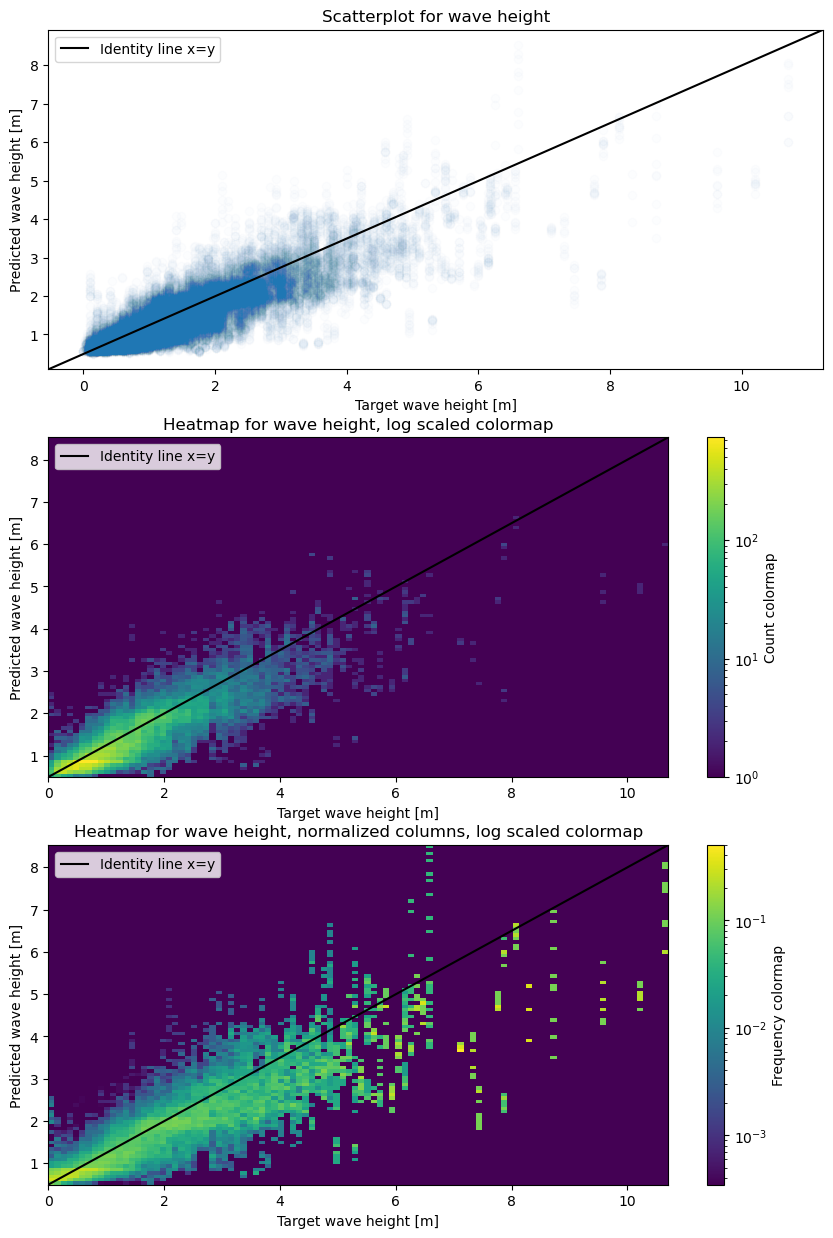

In [19]:
scatterplot_and_heatmaps(wave_result_df, "wave height", "m", "target_wave", "prediction_wave")

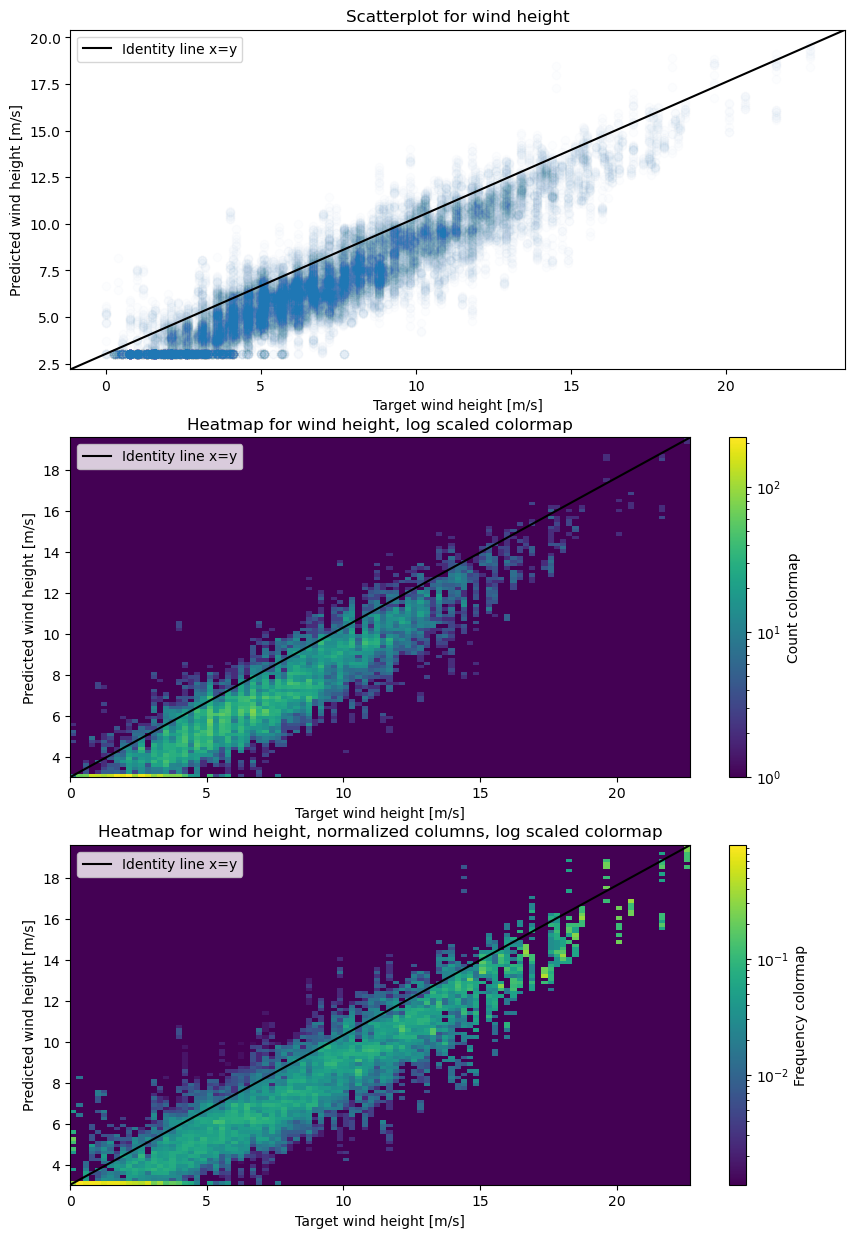

In [20]:
scatterplot_and_heatmaps(wind_result_df, "wind height", "m/s", "target_wind", "prediction_wind")